In [1]:
import cv2
import torch
import numpy as np

In [4]:
img = cv2.imread("./v4biucjqejb91.png")

In [8]:
img = cv2.resize(img, (224,224), cv2.INTER_LINEAR)

In [10]:
import matplotlib.pyplot as plt

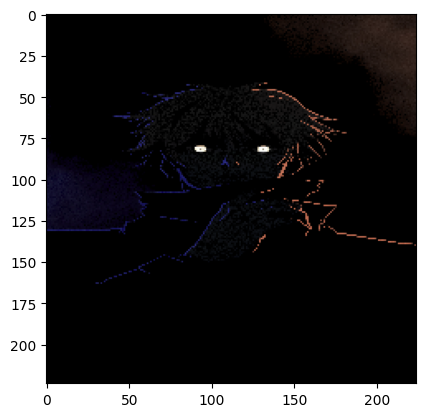

In [11]:
plt.imshow(img)
plt.show()

In [13]:
from albumentations.pytorch.transforms import ToTensorV2
import albumentations as A

tfms = A.Compose([
    ToTensorV2()
])

img_as_tensor = tfms(image=img)['image']
img_as_tensor.shape

torch.Size([3, 224, 224])

In [14]:
img_as_tensor = torch.unsqueeze(img_as_tensor, dim=0)
img_as_tensor.shape

torch.Size([1, 3, 224, 224])

In [15]:
mask = torch.eye(224)
mask.shape

torch.Size([224, 224])

In [16]:
mask = torch.unsqueeze(torch.unsqueeze(mask, dim=0), dim=0)

In [17]:
mask.shape

torch.Size([1, 1, 224, 224])

In [18]:
mask

tensor([[[[1., 0., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          [0., 0., 1.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 1., 0., 0.],
          [0., 0., 0.,  ..., 0., 1., 0.],
          [0., 0., 0.,  ..., 0., 0., 1.]]]])

In [19]:
final_tensor = img_as_tensor * mask
final_tensor.shape

torch.Size([1, 3, 224, 224])

In [23]:
# NCHW - > NWHC chce zeby na pierwszym miejscu pojawil sie pierwszy element | na drugim miejscu pojawil sie 3 element | na trzecim miejscu
x = final_tensor.permute(0, 3, 2, 1)
x.shape

torch.Size([1, 224, 224, 3])

In [25]:
final_image = x.squeeze(dim=0).detach().cpu().numpy()
final_image.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


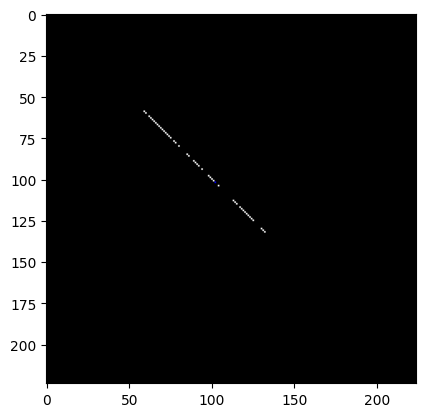

In [26]:
plt.imshow(final_image)
plt.show()